<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Creating-the-data-set-(target,-dummy)" data-toc-modified-id="Creating-the-data-set-(target,-dummy)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Creating the data set (target, dummy)</a></span></li><li><span><a href="#Standardize-data" data-toc-modified-id="Standardize-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Standardize data</a></span></li><li><span><a href="#Build-MLP" data-toc-modified-id="Build-MLP-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Build MLP</a></span><ul class="toc-item"><li><span><a href="#First-model" data-toc-modified-id="First-model-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>First model</a></span></li><li><span><a href="#Second-model" data-toc-modified-id="Second-model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Second model</a></span></li><li><span><a href="#Result" data-toc-modified-id="Result-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Result</a></span></li><li><span><a href="#Third-Model" data-toc-modified-id="Third-Model-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Third Model</a></span></li><li><span><a href="#Fourth-model:--unscaled-data" data-toc-modified-id="Fourth-model:--unscaled-data-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Fourth model:  unscaled data</a></span></li></ul></li></ul></div>

# Imports

In [3]:
import numpy as np 
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams

plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import itertools
import statsmodels.api as sm
import operator

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

import time

import re
from bs4 import BeautifulSoup
import requests
import urllib.request
from urllib.request import Request, urlopen

import keras
from keras.models import Sequential
from keras.layers import Dense


In [4]:
df = pd.read_csv('cleaned_coffee_reviews.csv')

In [5]:
df.columns
df = df.drop(columns=['Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0'], axis=1)
df.head(2)

,Coffee Name,Roaster Name,Roaster Location,Coffee Origin,Rating,Roast Level,Review Date,Price,Agtron,Flavor,Body,Aroma,Aftertaste,Acidity,Bottom Line,Prices Per Oz,Agtron Whole,Agtron Ground,Coffee Country
0,Costa Rica Luis Campos Anaerobic,Revel Coffee,"Billings, Montana","Tarrazu, Costa Rica",94,Medium-Light,April 2020,$23.00/12 ounces,58/76,9,9,9,8,9.0,Enjoying this Costa Rica evokes the pleasures ...,1.92,58,76,Costa Rica
1,Colombia Granja La Esperanza Tres Dragones,PT's Coffee Roasting Co.,"Topeka, Kansas","Valle del Cauca growing region, Colombia",94,Medium-Light,April 2020,$23.50/12 ounces,60/74,9,9,9,8,9.0,A bombshell of a coffee with enough personalit...,1.96,60,74,Colombia


# Creating the data set (target, dummy)

In [6]:
# A rating of 95 or better is about 10% of the coffees
# A rating of 94 or better is about 25% of the coffees
df['Great'] = [1 if x >= 95 else 0 for x in df['Rating']] 

In [7]:
rl_dummies = pd.get_dummies(df['Roast Level'], prefix='RL')

In [8]:
country_dummies = pd.get_dummies(df['Coffee Country'], prefix='CC')

In [9]:
df = pd.concat([df, rl_dummies, country_dummies], axis=1)
df.head(2)

,Coffee Name,Roaster Name,Roaster Location,Coffee Origin,Rating,Roast Level,Review Date,Price,Agtron,Flavor,...,CC_Tanzania,CC_Thailand,CC_USA,CC_Uganda,CC_United Kingdom,CC_World Blend,CC_Yemen,CC_Zambia,CC_Zimbabwe,CC_undisclosed
0,Costa Rica Luis Campos Anaerobic,Revel Coffee,"Billings, Montana","Tarrazu, Costa Rica",94,Medium-Light,April 2020,$23.00/12 ounces,58/76,9,...,0,0,0,0,0,0,0,0,0,0
1,Colombia Granja La Esperanza Tres Dragones,PT's Coffee Roasting Co.,"Topeka, Kansas","Valle del Cauca growing region, Colombia",94,Medium-Light,April 2020,$23.50/12 ounces,60/74,9,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y = df['Great']
X = df.drop(columns=['Coffee Name','Roaster Name','Roaster Location','Coffee Origin','Rating','Roast Level','Review Date',
                     'Price','Agtron','Bottom Line','Agtron Whole','Great','Coffee Country'], axis=1)

In [11]:
# 52 columns
# X.head()

# Standardize data

In [12]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Build MLP
Section 45

## First model

In [13]:
model_1 = Sequential()
model_1.add(Dense(5, activation='tanh', input_shape=(52,)))
model_1.add(Dense(1, activation='sigmoid'))

In [14]:
model_1.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [15]:
results_1 = model_1.fit(scaled_X, y, epochs=25, batch_size=1, validation_split=0.2)

Train on 1756 samples, validate on 439 samples
Epoch 1/25
1756/1756 [==============================] - 3s 2ms/step - loss: 0.2541 - acc: 0.9055 - val_loss: 0.1185 - val_acc: 0.9590
Epoch 2/25
1756/1756 [==============================] - 3s 2ms/step - loss: 0.1064 - acc: 0.9721 - val_loss: 0.0729 - val_acc: 0.9841
Epoch 3/25
1756/1756 [==============================] - 3s 2ms/step - loss: 0.0685 - acc: 0.9892 - val_loss: 0.0579 - val_acc: 0.9841
Epoch 4/25
1756/1756 [==============================] - 3s 2ms/step - loss: 0.0486 - acc: 0.9966 - val_loss: 0.0558 - val_acc: 0.9818
Epoch 5/25
1756/1756 [==============================] - 2s 1ms/step - loss: 0.0381 - acc: 0.9972 - val_loss: 0.0523 - val_acc: 0.9863
Epoch 6/25
1756/1756 [==============================] - 2s 1ms/step - loss: 0.0303 - acc: 0.9972 - val_loss: 0.0546 - val_acc: 0.9863
Epoch 7/25
1756/1756 [==============================] - 3s 1ms/step - loss: 0.0251 - acc: 0.9972 - val_loss: 0.0525 - val_acc: 0.9863
Epoch 8/25
1756

In [16]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['test_loss', 'train_loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['test_acc', 'train_acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

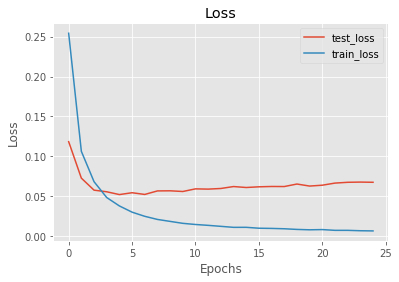

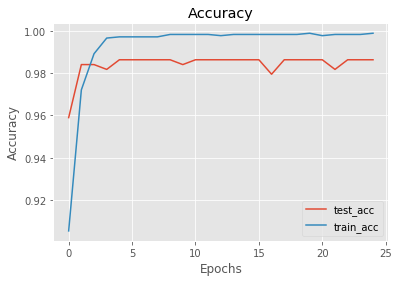

In [17]:
# Val_loss = validation or "testing"
# loss = training loss
# Overfitting around 3 epoch when training performance improves but testing slightly increases

visualize_training_results(results_1)

## Second model

In [18]:
model_2 = Sequential()
model_2.add(Dense(10, activation='tanh', input_shape=(52,)))
model_2.add(Dense(5, activation='tanh'))
model_2.add(Dense(1, activation='sigmoid'))

In [19]:
model_2.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [20]:
results_2 = model_2.fit(scaled_X, y, epochs=25, batch_size=1, validation_split=0.2)

Train on 1756 samples, validate on 439 samples
Epoch 1/25
1756/1756 [==============================] - 4s 2ms/step - loss: 0.3080 - acc: 0.8924 - val_loss: 0.1182 - val_acc: 0.9522
Epoch 2/25
1756/1756 [==============================] - 4s 3ms/step - loss: 0.1121 - acc: 0.9715 - val_loss: 0.0705 - val_acc: 0.9727
Epoch 3/25
1756/1756 [==============================] - 3s 2ms/step - loss: 0.0575 - acc: 0.9869 - val_loss: 0.0598 - val_acc: 0.9772
Epoch 4/25
1756/1756 [==============================] - 3s 2ms/step - loss: 0.0320 - acc: 0.9966 - val_loss: 0.0609 - val_acc: 0.9841
Epoch 5/25
1756/1756 [==============================] - 3s 2ms/step - loss: 0.0281 - acc: 0.9937 - val_loss: 0.0620 - val_acc: 0.9863
Epoch 6/25
1756/1756 [==============================] - 3s 2ms/step - loss: 0.0219 - acc: 0.9937 - val_loss: 0.0662 - val_acc: 0.9749
Epoch 7/25
1756/1756 [==============================] - 4s 2ms/step - loss: 0.0174 - acc: 0.9966 - val_loss: 0.0740 - val_acc: 0.9772
Epoch 8/25
1756

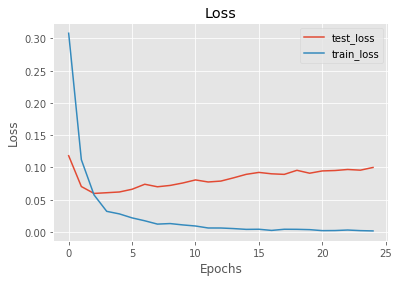

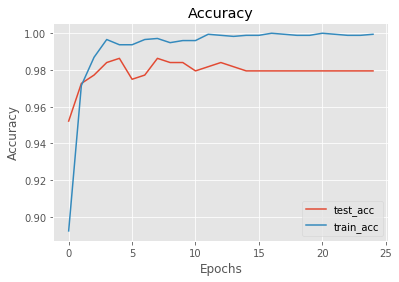

In [21]:
visualize_training_results(results_2)

## Result
Adding another layer didn't make the model better, in fact, it seemed to overtrain it more.

## Third Model

In [30]:
model_3 = Sequential()
model_3.add(Dense(5, activation='tanh', input_shape=(52,)))
model_3.add(Dense(1, activation='relu'))

In [31]:
model_3.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [32]:
results_3 = model_3.fit(scaled_X, y, epochs=25, batch_size=1, validation_split=0.2)

Train on 1756 samples, validate on 439 samples
Epoch 1/25
1756/1756 [==============================] - 3s 2ms/step - loss: 1.7029 - acc: 0.8759 - val_loss: 0.9913 - val_acc: 0.9385
Epoch 2/25
1756/1756 [==============================] - 3s 2ms/step - loss: 1.7899 - acc: 0.8890 - val_loss: 0.9913 - val_acc: 0.9385
Epoch 3/25
1756/1756 [==============================] - 3s 2ms/step - loss: 1.7899 - acc: 0.8890 - val_loss: 0.9913 - val_acc: 0.9385
Epoch 4/25
1756/1756 [==============================] - 3s 2ms/step - loss: 1.7899 - acc: 0.8890 - val_loss: 0.9913 - val_acc: 0.9385
Epoch 5/25
1756/1756 [==============================] - 3s 2ms/step - loss: 1.7899 - acc: 0.8890 - val_loss: 0.9913 - val_acc: 0.9385
Epoch 6/25
1756/1756 [==============================] - 3s 2ms/step - loss: 1.7899 - acc: 0.8890 - val_loss: 0.9913 - val_acc: 0.9385
Epoch 7/25
1756/1756 [==============================] - 3s 2ms/step - loss: 1.7899 - acc: 0.8890 - val_loss: 0.9913 - val_acc: 0.9385
Epoch 8/25
1756

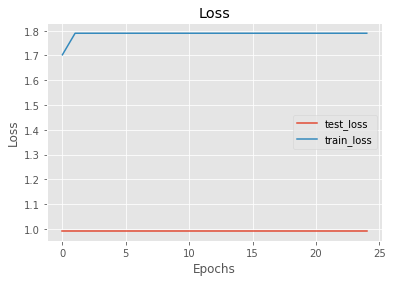

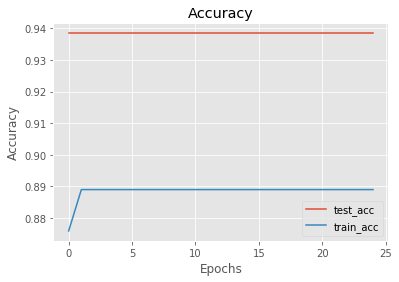

In [33]:
visualize_training_results(results_3)

## Fourth model:  unscaled data

In [25]:
model_4 = Sequential()
model_4.add(Dense(5, activation='tanh', input_shape=(52,)))
model_4.add(Dense(1, activation='sigmoid'))

In [26]:
model_4.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [27]:
results_4 = model_4.fit(X, y, epochs=25, batch_size=1, validation_split=0.2)

Train on 1756 samples, validate on 439 samples
Epoch 1/25
1756/1756 [==============================] - 3s 2ms/step - loss: 0.3650 - acc: 0.8798 - val_loss: 0.2493 - val_acc: 0.9385
Epoch 2/25
1756/1756 [==============================] - 3s 1ms/step - loss: 0.3510 - acc: 0.8890 - val_loss: 0.2440 - val_acc: 0.9385
Epoch 3/25
1756/1756 [==============================] - 3s 1ms/step - loss: 0.3503 - acc: 0.8890 - val_loss: 0.2529 - val_acc: 0.9385
Epoch 4/25
1756/1756 [==============================] - 2s 1ms/step - loss: 0.3507 - acc: 0.8890 - val_loss: 0.2397 - val_acc: 0.9385
Epoch 5/25
1756/1756 [==============================] - 2s 1ms/step - loss: 0.3502 - acc: 0.8890 - val_loss: 0.2358 - val_acc: 0.9385
Epoch 6/25
1756/1756 [==============================] - 3s 1ms/step - loss: 0.3510 - acc: 0.8890 - val_loss: 0.2464 - val_acc: 0.9385
Epoch 7/25
1756/1756 [==============================] - 2s 1ms/step - loss: 0.3507 - acc: 0.8890 - val_loss: 0.2365 - val_acc: 0.9385
Epoch 8/25
1756

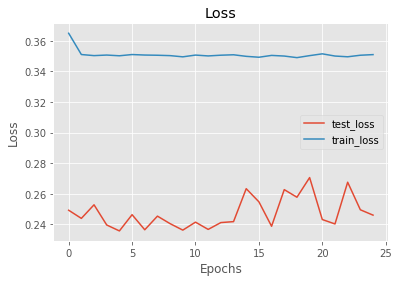

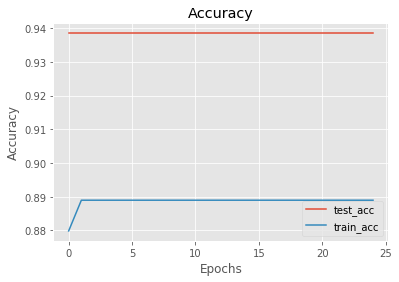

In [28]:
visualize_training_results(results_4)